---
title: 'py50 - Now with Updates!'
author: 'Tony E. Lin'
date: '2024-01-09'
categories: [Python, Streamlit, Coding, Informatics, Plotting]
---

## py50 Introduction

It is a new year. That means we can start fresh. No need to look at the past entries when I was starting the blog 🫣. 

I have tested py50 and fixed the bugs previously found, while also adding some, hopefully, quality of life enhancements. Teh quality of life enhancements are mostly for me, as I have refactored a lot of the code to make future maintenance easier. I can reduce the code further, but for now, I like what I have. For the user, the  quality of life enhancements are more prevalent with the py50 Streamlit Web Application ([link here](https://py50-app.streamlit.app)) and include things like grammar, UI consistency, and information to inform the user of what units the data is in or the type of calculations made. These updates, while important for user experience, are more involved and should be rolling out at the end of the month. 

In contrast, the py50 python module is good to go and I am ready to introduce them. This post is adapted from the [Quickstart Tutorial](https://github.com/tlint101/py50/blob/main/tutorials/001_quickstart.ipynb), only with a little more of my personal flair - A lot more fun for me to write, but (hopefully) not annoying for readers.

Here I will introduce (as of this writing) py50 v0.3.2.

## How does py50 work?

There are software available to calculate IC50. GraphPad is a popular choice. There is also an online [IC50 Calculator](https://www.aatbio.com/tools/ic50-calculator) by AAT Bioquest. These can be great choices, but not particularly ones that fit users who want to automate everything through code. 

That is where py50 comes in. py50 can work directly with a pandas DataFrame. This makes it easy to quickly modify the data into a favorable format by the user before graphing. Currently, there are three submodules associated with py50. Here we will import all of them. 

In [1]:
import pandas as pd
from py50.calculator import Calculator
from py50.plotcurve import PlotCurve
from py50.plot_settings import CBMARKERS, CBPALETTE

## Calculate Relative and Absolute IC50

First we will calculate Relative and Absolute IC50. A future post will dive deeper into the differences between the two. For now, we are concerned with calculating them. py50 uses the Four Paramater Logistic (4PL) Regression algorithm to calculate the IC50:
$$Y = \text{Min} + \frac{\text{Max} - \text{Min}}{1 + \left(\frac{X}{\text{IC50}}\right)^{\text{Hill coefficient}}}$$
where min is the minimum response value, max is the maximum response value, Y is the response values of the curves, and X is the concentration.


In [2]:
# Read in dataset
example = pd.read_csv('datasets/py50/single_example.csv')

calc_data = Calculator(example) # Instantiate dataframe into the Calculator class 
calc_data.show().head()

,Compound Name,Compound Conc,% Inhibition 1,% Inhibition 2,% Inhibition Avg
0,Drug 1,100000.0,90,94,92
1,Drug 1,33300.0,97,89,93
2,Drug 1,11100.0,86,89,88
3,Drug 1,3700.0,81,88,84
4,Drug 1,1240.0,63,70,67


Once we have the data loaded, the calculations can be performed. If only relative IC50 is needed, users cna call the calc_data.calculate_ic50() function instead. Both functions work the same and need three columns to function properly - name of the column, concentration column, and the response column. 

In [3]:
calculation = calc_data.calculate_absolute_ic50(name_col='Compound Name', concentration_col='Compound Conc', response_col='% Inhibition Avg')
calculation

,compound_name,maximum,minimum,relative ic50 (nM),absolute ic50 (nM),hill_slope
0,Drug 1,92.854428,-7.640263,439.823988,584.734114,1.040875


If IC50 is not your cup of tea, you can quickly scale the values into pIC50 values. This is done using the calculate_pic50() function. This will calculate absolute IC50, but will append two additional columns for the relative pIC50 and absolute pIC50, respectively.

In [4]:
calculation = calc_data.calculate_pic50(name_col='Compound Name', concentration_col='Compound Conc', response_col='% Inhibition Avg')
calculation

,compound_name,maximum,minimum,relative ic50 (nM),absolute ic50 (nM),hill_slope,relative pIC50,absolute pIC50
0,Drug 1,92.854428,-7.640263,439.823988,584.734114,1.040875,6.356721,6.233042


## Single Curve

Okay, so the calculations are all well and good, but what if I want to have my data represented a graph? Godo news! py50 is able to handle this with ease. There are three different types of plots that can be generated. Here we will start with the classic single dose-response curve. 

This can be done by using hte single_curve_plot() function. As for the parameters, I personally prefer lots of options. I like to be able to tweak my images to my liking. It is my goal to give these same options to other users. All three types of plots have a lot of arguments, which while daunting, I think can generate a figure that really fits the user's personality and use case. These can be found in the documentation page [here](https://py50.readthedocs.io/en/latest/plotcurve.html#plotcurve.PlotCurve). 

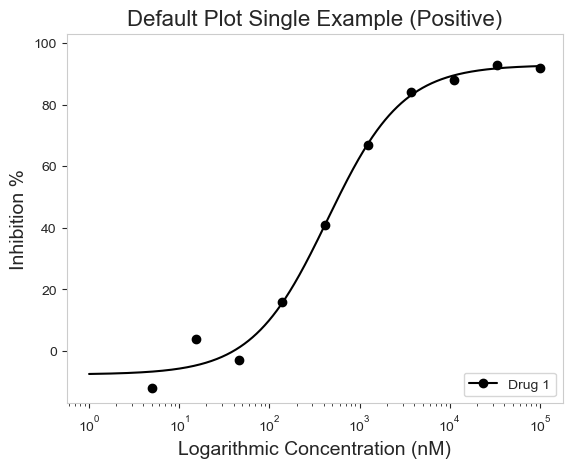

In [5]:
single = pd.read_csv('datasets/py50/single_example.csv')
plot_data = PlotCurve(single)

figure = plot_data.single_curve_plot(concentration_col='Compound Conc',
                                     response_col='% Inhibition Avg',
                                     plot_title='Default Plot Single Example (Positive)',
                                     drug_name='Drug 1',
                                     xlabel='Logarithmic Concentration (nM)',
                                     ylabel='Inhibition %',
                                     legend=True,
                                     # Sometimes the legend needs to be manually adjusted and can be with the legend_loc argument
                                     legend_loc='lower right')

The graphing works great for both positive and negative curves (The older versions of py50 had issues handling this. I forgot the [carry the one](https://giphy.com/gifs/season-9-the-simpsons-9x20-xT5LMBhZ4hSUIpf3qg). Oops!). 

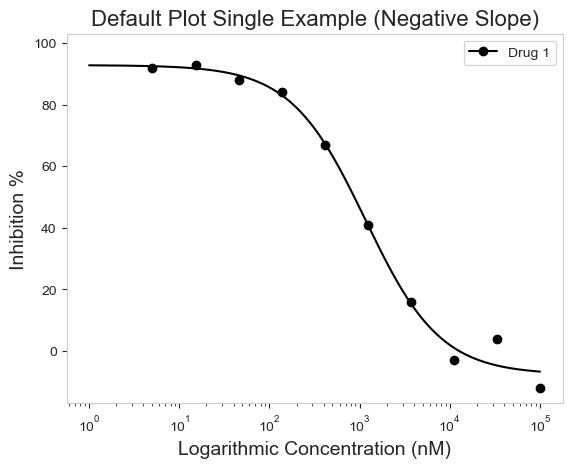

In [6]:
single_negative = pd.read_csv('datasets/py50/single_example_negative.csv')
plot_data = PlotCurve(single_negative)
figure = plot_data.single_curve_plot(concentration_col='Compound Conc',
                                     response_col='% Inhibition Avg',
                                     plot_title='Default Plot Single Example (Negative Slope)',
                                     drug_name='Drug 1',
                                     xlabel='Logarithmic Concentration (nM)',
                                     ylabel='Inhibition %',
                                     legend=True)

## Multi-Curve

Those graphs look good! But what if you are working with more than one drug? True, we can loop over each drug and generate single curve plots for each one. But there are times that combining the curves onto a single plot would be more descriptive of our data or story. The other two options allow just that! First we will go through the multi-curve plot. 

The multi_curve_plot() function works in much the same way as the single_curve_plot() above. The main difference is that multi_curve_plot will inherently scan the name_col for unique names and generate the plot accordingly. By default, the CBPALETTE and CBMARKERS, can handle up to eight items. I do not think that should be an issue since, with the four curves in the example, it looks busy already. But more is an option if needed.   

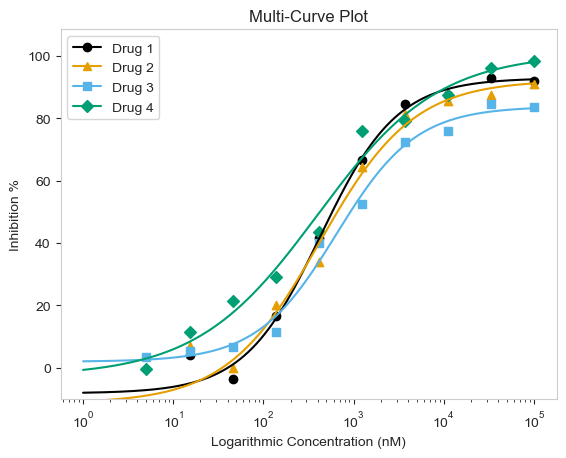

In [7]:
# Read in Dataset
multi = pd.read_csv('datasets/py50/multiple_example.csv')

# Instantiate dataframe into the PlotCurve class 
plot_data = PlotCurve(multi)

# Optional to inspect table
plot_data.show()

# Generate figure
figure = plot_data.multi_curve_plot(name_col='Compound Name',
                                    concentration_col='Compound Conc',
                                    response_col='% Inhibition Avg',
                                    plot_title='Multi-Curve Plot',
                                    xlabel='Logarithmic Concentration (nM)',
                                    ylabel='Inhibition %',
                                    legend=True,
                                    line_color=CBPALETTE,
                                    marker=CBMARKERS,
                                    # To adjust Y-Axis, can use ymax or ymin arguments
                                    ymin=-10)

Again, the functions will work for both positive and negative curves!

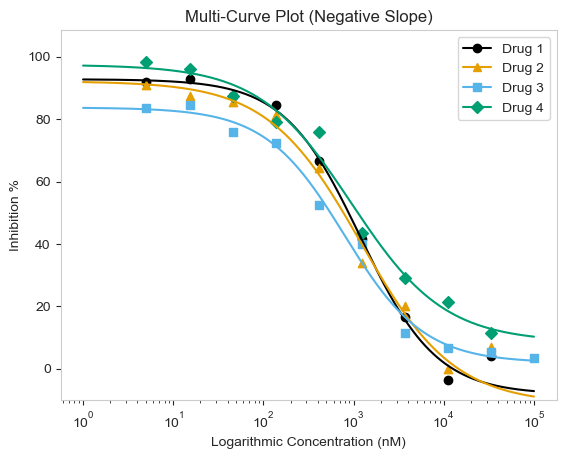

In [8]:
# For negative slope
# Read in Dataset
multi = pd.read_csv('datasets/py50/multiple_example_negative.csv')

# Instantiate dataframe into the PlotCurve class 
plot_data = PlotCurve(multi)

figure = plot_data.multi_curve_plot(name_col='Compound Name',
                                    concentration_col='Compound Conc',
                                    response_col='% Inhibition Avg',
                                    plot_title='Multi-Curve Plot (Negative Slope)',
                                    xlabel='Logarithmic Concentration (nM)',
                                    ylabel='Inhibition %',
                                    legend=True,
                                    line_color=CBPALETTE,
                                    marker=CBMARKERS,
                                    ymin=-10)

## Grid Plot

Finally, there is the grid_plot() function. This works very much the same as the multi_curve_plot() above, except each curve will be drawn as a single plot arrayed in a grid. This is good if you already have a particular layout, but want to draw multiple curves. The function works very similarly to the other two functions above.   

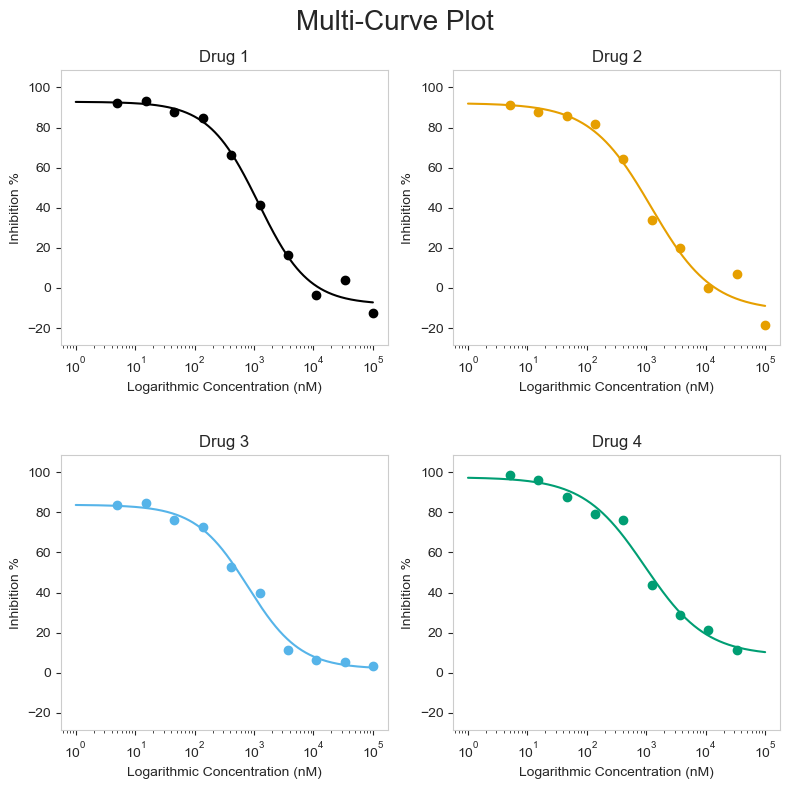

In [9]:
# Read in Dataset
grid = pd.read_csv('datasets/py50/multiple_example_negative.csv')

# Instantiate dataframe into the PlotCurve class 
grid_plot = PlotCurve(grid)

# Optional to inspect table
# grid_plot.show()

figure = grid_plot.grid_curve_plot(name_col='Compound Name',
                                   concentration_col='Compound Conc',
                                   response_col='% Inhibition Avg',
                                   plot_title='Multi-Curve Plot',
                                   xlabel=('Logarithmic Concentration (nM)'),
                                   ylabel='Inhibition %',
                                   conc_unit='nM',
                                   # adjusting the figsize() may be needed for columns bigger than 1 by 2
                                   figsize=(8,8))

## Conclusion

That is it!

This is my first very big (in my eyes) python project and I learned a lot. Hopefully the pacakge can help others too. 

And for anyone reading this who are not code savvy, I have converted py50 into a web application using streamlit. It can be found [here](https://py50-app.streamlit.app). The update may be a little bit slower, as managing UI takes a bit more time, but hopefully this makes py50 more accessible to people. 

Thanks for reading. 🙌 